In [57]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

In [58]:
# Load the nou_hearings

nou_hearings = pd.read_csv('../../dataset/nou_hearings.csv')

# Sample of the data

nou_hearings_sample = nou_hearings.sample(50).reset_index(drop=True)
nou_hearings_sample

,actor,text,date,actor_label
0,Hovedorganisasjonen Virke,Dialog med næringslivet i det videre arbeidet ...,15.02.2024,Interessegruppe
1,Norges Rederiforbund,Vi foreslår at inntektene fra rederienes kjøp ...,28.02.2024,Interessegruppe
2,Lyntogforum,Dessuten er kapasiteten anstrengt eller spreng...,28.02.2024,Frivillig organisasjon
3,Norsk Hydro,Norge har svært gode forutsetninger for å bygg...,28.02.2024,Bedrift
4,Offshore Norge,En konsekvens av veivalget til Klimautvalget e...,16.01.2024,Bedrift
5,Vestland fylkeskommune,9. Fylkesutvalet støtter Klimautvalet sin anbe...,15.02.2024,Offentlig forvaltning
6,Avinor,Luftfarten er arealeffektiv og i Norge er infr...,26.01.2024,Bedrift
7,Person som ikke har oppgitt navn (140397),6. Det er også viktig å se Norge i en global s...,23.02.2024,Privatperson
8,Sivilingeniør Arve Gleissner Gustavsen,Høringsutvalgets rapporten fra 25. oktober 202...,03.02.2024,Privatperson
9,Statkraft AS,Statkraft deler en rekke av utvalgets vurderin...,31.01.2024,Bedrift


In [59]:

import token


nlp = spacy.load('nb_core_news_md')

# Tokenize the text
def preprocess_text(text):
    
    doc = nlp(text.lower())
    tokens = [token.text for token in doc]
    return tokens


nlp = spacy.load('nb_core_news_md')


tokenized_docs = [preprocess_text(doc) for doc in nou_hearings_sample["text"]]

tagged_docs = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_docs)]

model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=40)
model.build_vocab(tagged_docs)
model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)

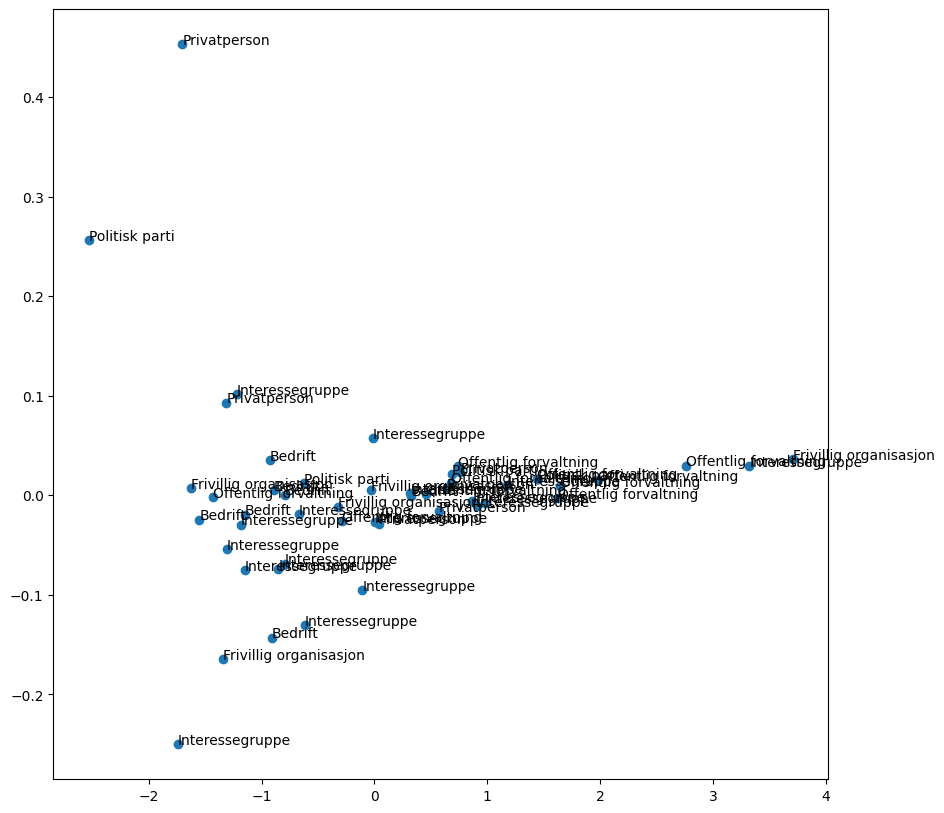

In [60]:
# Visualize the embeddings

doc_vectors = [model.infer_vector(doc) for doc in tokenized_docs]

pca = PCA(n_components=2)
doc_vec_2d = pca.fit_transform(doc_vectors)

plt.figure(figsize=(10, 10))
plt.scatter(doc_vec_2d[:, 0], doc_vec_2d[:, 1])

for i, actor in enumerate(nou_hearings_sample["actor_label"]):
    plt.annotate(actor, (doc_vec_2d[i, 0], doc_vec_2d[i, 1]))

## LSA

In [61]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import spacy

In [62]:
# Get stopwords
nlp = spacy.load('nb_core_news_md')
stopwords = nlp.Defaults.stop_words

print(stopwords)


{'ikke', 'du', 'har', 'gi', 'så', 'plass', 'vant', 'først', 'tatt', 'mener', 'bli', 'vil', 'kroner', 'kampen', 'hadde', 'ingen', 'opplyser', 'neste', 'var', 'viser', 'sin', 'får', 'over', 'mål', 'etter', 'til', 'skulle', 'jeg', 'måtte', 'ja', 'mellom', 'gang', 'ville', 'folk', 'disse', 'fra', 'gjennom', 'blir', 'litt', 'kveld', 'gikk', 'tror', 'står', 'man', 'utenfor', 'de', 'også', 'må', 'vår', 'inn', 'enn', 'gjøre', 'her', 'flere', 'igjen', 'like', 'bris', 'mennesker', 'nok', 'god', 'allerede', 'alle', 'fram', 'få', 'kontakt', 'andre', 'fjor', 'nå', 'sitt', 'siste', 'å', 'sier', 'dem', 'hun', 'helt', 'selv', 'poeng', 'svært', 'kunne', 'fikk', 'gå', 'tok', 'rundt', 'ham', 'et', 'i', 'bedre', 'and', 'la', 'runde', 'sammen', 'seg', 'kort', 'av', 'fire', 'komme', 'det', 'en', 'ned', 'viktig', 'er', 'se', 'mens', 'landet', 'mer', 'alt', 'om', 'den', 'første', 'dette', 'fortsatt', 'men', 'noen', 'når', 'ut', 'seks', 'fem', 'kommer', 'blant', 'for', 'videre', 'både', 'der', 'han', 'satt', '

In [63]:
corpus = nou_hearings_sample["text"]

vecotorizer = TfidfVectorizer(stop_words=list(stopwords))
X = vecotorizer.fit_transform(corpus)

lsa = TruncatedSVD(n_components=2, random_state=42)
lsa_matrix = lsa.fit_transform(X)

lsa_matrix = pd.DataFrame(lsa_matrix, columns=["component_1", "component_2"])
lsa_matrix = pd.concat([lsa_matrix, nou_hearings_sample["actor"]], axis=1)
lsa_matrix

,component_1,component_2,actor
0,0.080669,0.160403,Hovedorganisasjonen Virke
1,0.122667,-0.073253,Norges Rederiforbund
2,0.051442,-0.021414,Lyntogforum
3,0.376236,-0.129460,Norsk Hydro
4,0.309040,-0.042744,Offshore Norge
5,0.094967,-0.049952,Vestland fylkeskommune
6,0.076542,-0.046233,Avinor
7,0.267436,0.202652,Person som ikke har oppgitt navn (140397)
8,0.234931,-0.312956,Sivilingeniør Arve Gleissner Gustavsen
9,0.299104,-0.101698,Statkraft AS


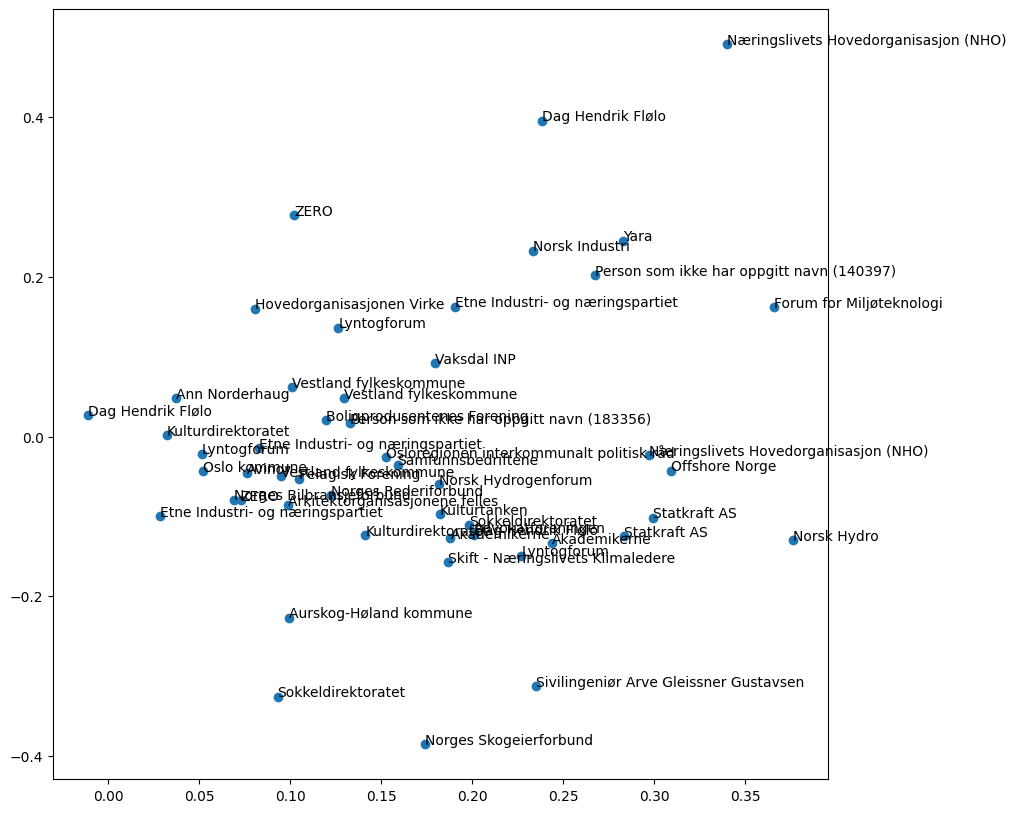

In [65]:
# Visualize the embeddings
plt.figure(figsize=(10, 10))
plt.scatter([lsa_matrix["component_1"]], [lsa_matrix["component_2"]])

for i, actor in enumerate(lsa_matrix["actor"]):
    plt.annotate(actor, (lsa_matrix["component_1"][i], lsa_matrix["component_2"][i]))